In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
air_df= pd.read_csv('airlines_flights_data.csv')

In [3]:
air_df.head(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [4]:
air_df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [5]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
air_df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
air_df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
air_df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

## Q.1. What are the airlines in the dataset, accompanied by their frequencies?


In [9]:
air_df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

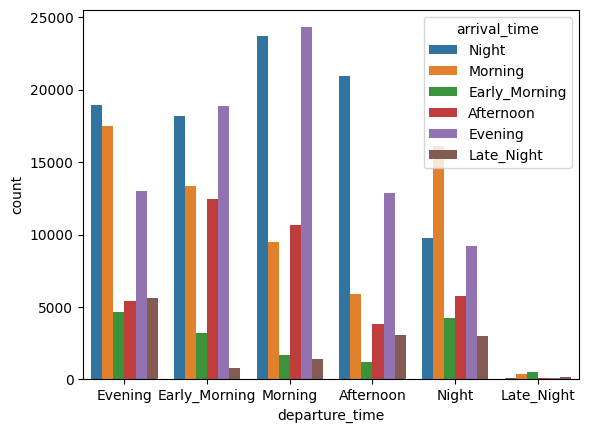

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=air_df, x='departure_time', hue='arrival_time')
plt.show()


<Axes: xlabel='departure_time'>

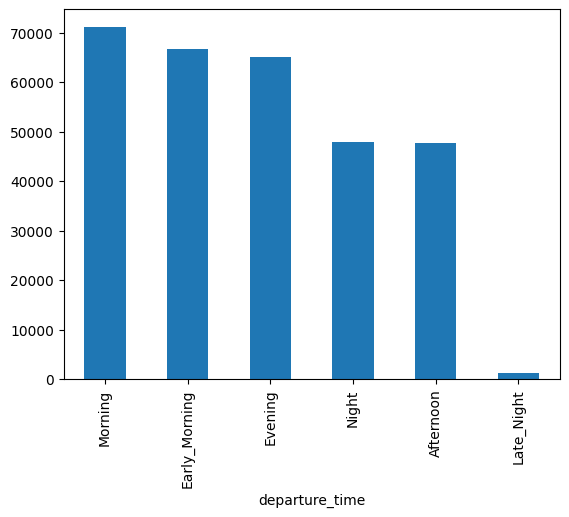

In [11]:
air_df['departure_time'].value_counts().plot(kind='bar')


## Q.3. Show Bar Graphs representing the Source City & Destination City.

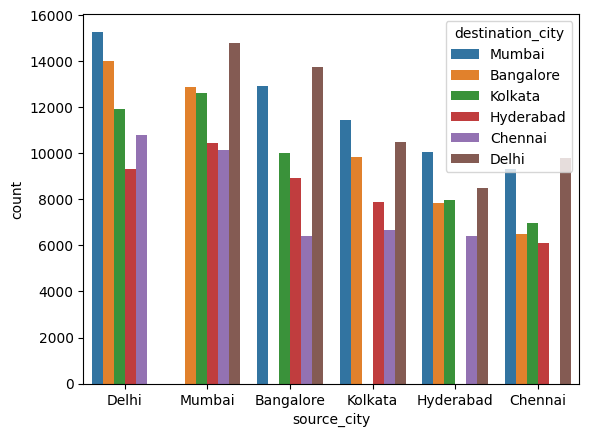

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=air_df, x='source_city', hue='destination_city')
plt.show()


 ## Q.4. Does price varies with airlines ?

In [13]:
air_df.groupby('airline')['price'].mean().sort_values()


airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

<Axes: title={'center': 'Average Price by Airline'}, xlabel='airline'>

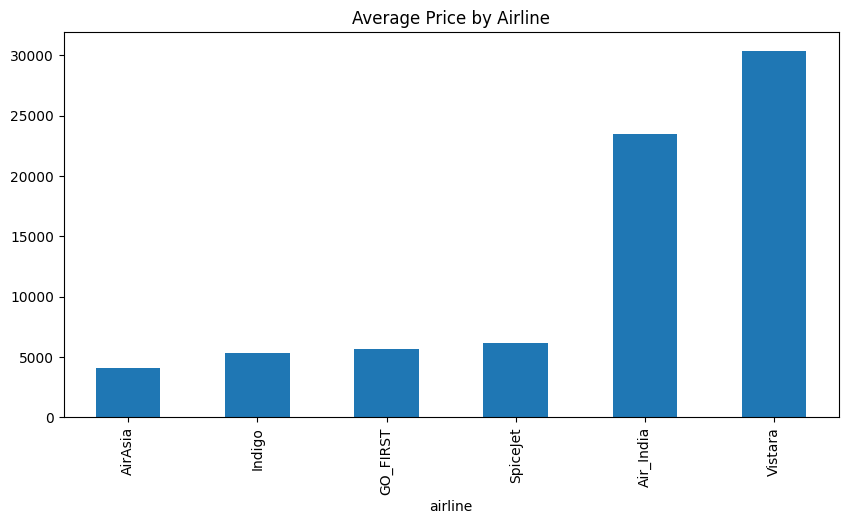

In [14]:
air_df.groupby('airline')['price'].mean().sort_values().plot(kind='bar', figsize=(10,5), title="Average Price by Airline")


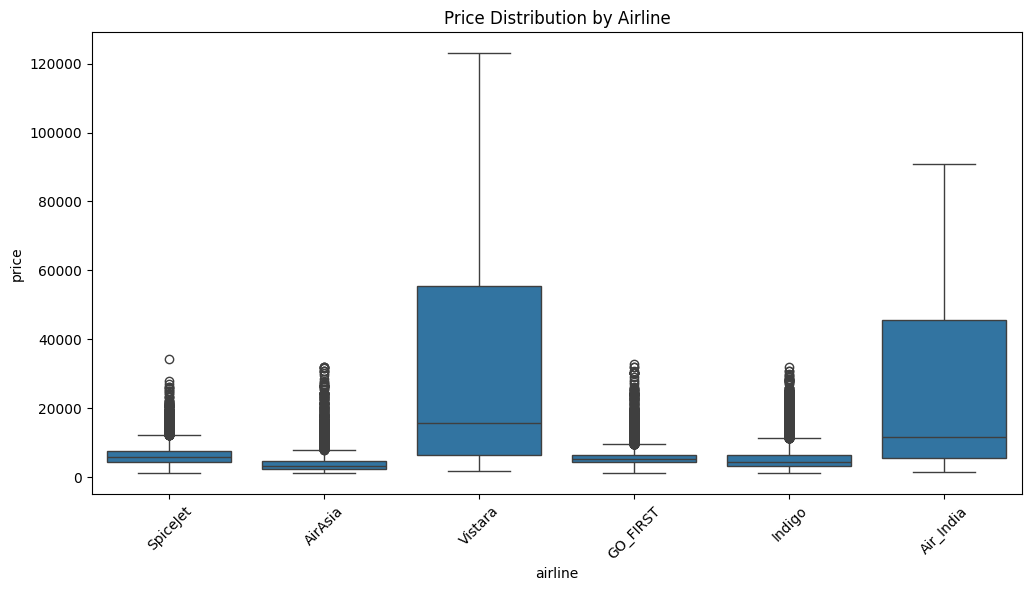

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=air_df, x='airline', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Airline")
plt.show()


## Q.5. Does ticket price change based on the departure time and arrival time?


In [16]:
air_df.groupby(['departure_time', 'arrival_time'])['price'].mean()


departure_time  arrival_time 
Afternoon       Afternoon        14741.746011
                Early_Morning    21159.511401
                Evening          15548.836651
                Late_Night       10811.615662
                Morning          26056.580994
                Night            19097.798757
Early_Morning   Afternoon        16564.731082
                Early_Morning     9540.191523
                Evening          24804.077441
                Late_Night       29638.037500
                Morning          12299.838792
                Night            25792.007764
Evening         Afternoon        25569.672277
                Early_Morning    18175.929529
                Evening          24612.547643
                Late_Night        8547.029235
                Morning          28326.216482
                Night            15641.705242
Late_Night      Afternoon        18520.684932
                Early_Morning     4548.700599
                Evening          21217.106383
    

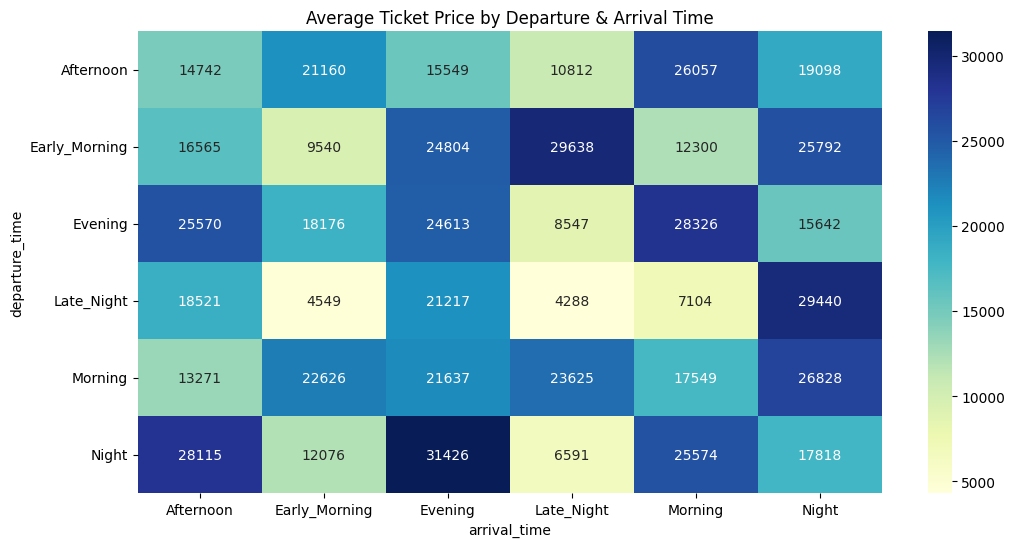

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = air_df.pivot_table(values='price', index='departure_time', columns='arrival_time', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Ticket Price by Departure & Arrival Time")
plt.show()


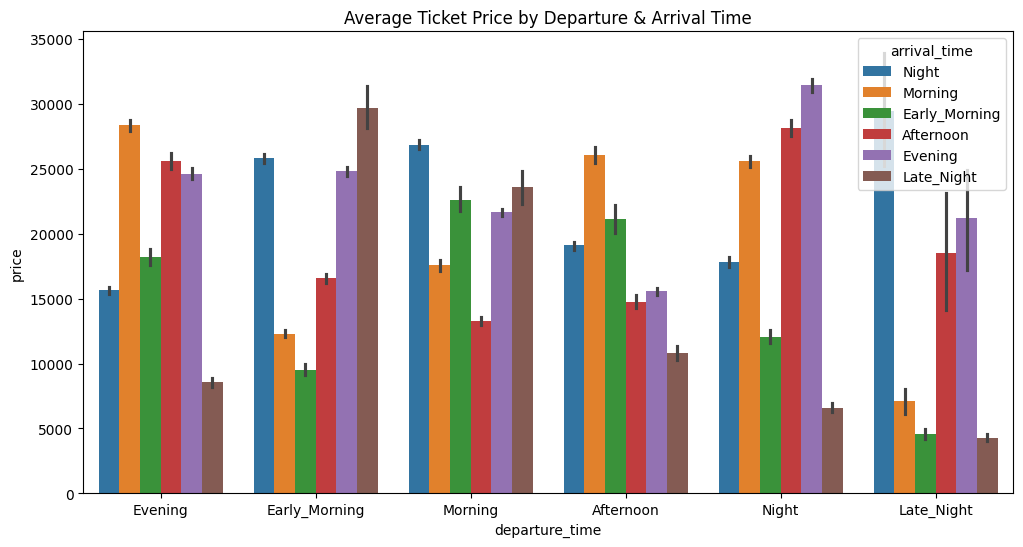

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=air_df, x='departure_time', y='price', hue='arrival_time', estimator='mean')
plt.title("Average Ticket Price by Departure & Arrival Time")
plt.show()


## Q.6. How the price changes with change in Source and Destination?

In [19]:
air_df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values()


source_city  destination_city
Hyderabad    Delhi               17243.945685
Delhi        Hyderabad           17347.288379
Bangalore    Delhi               17723.313972
Delhi        Bangalore           17880.216315
Mumbai       Delhi               18725.320008
Chennai      Delhi               18981.863948
Delhi        Mumbai              19355.829812
             Chennai             19369.881354
Kolkata      Delhi               19422.354559
Hyderabad    Mumbai              20080.865759
Delhi        Kolkata             20566.409418
Hyderabad    Kolkata             20823.893201
Mumbai       Hyderabad           21004.046705
Bangalore    Hyderabad           21226.121192
Hyderabad    Bangalore           21347.177998
Kolkata      Hyderabad           21500.011397
Chennai      Hyderabad           21591.345404
Hyderabad    Chennai             21848.065989
Kolkata      Mumbai              22078.883579
Mumbai       Kolkata             22379.146723
Chennai      Kolkata             22669.932407
Kolk

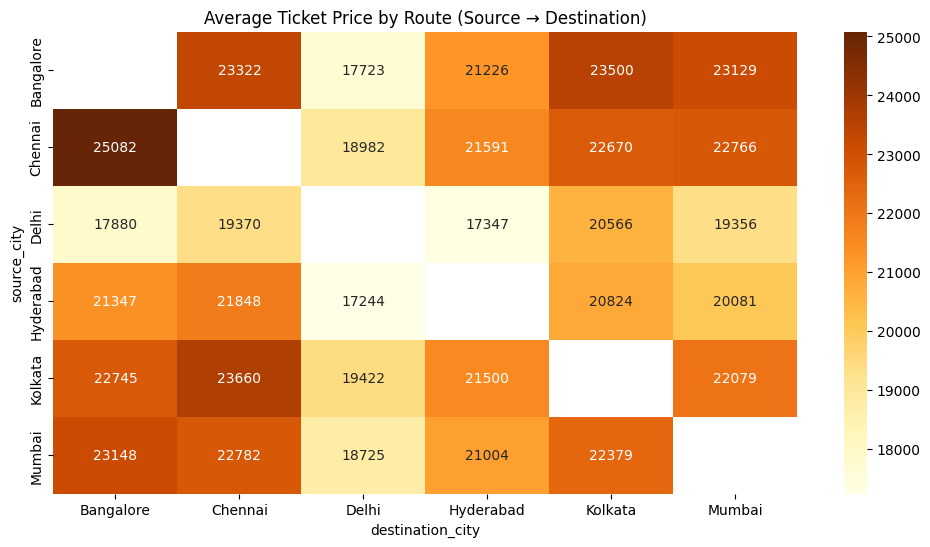

In [20]:
pivot = air_df.pivot_table(values= 'price', index ='source_city', columns= 'destination_city', aggfunc='mean')
plt.figure(figsize= (12,6))
sns.heatmap(pivot, annot= True, fmt=".0f", cmap='YlOrBr')
plt.title("Average Ticket Price by Route (Source → Destination)")
plt.show()


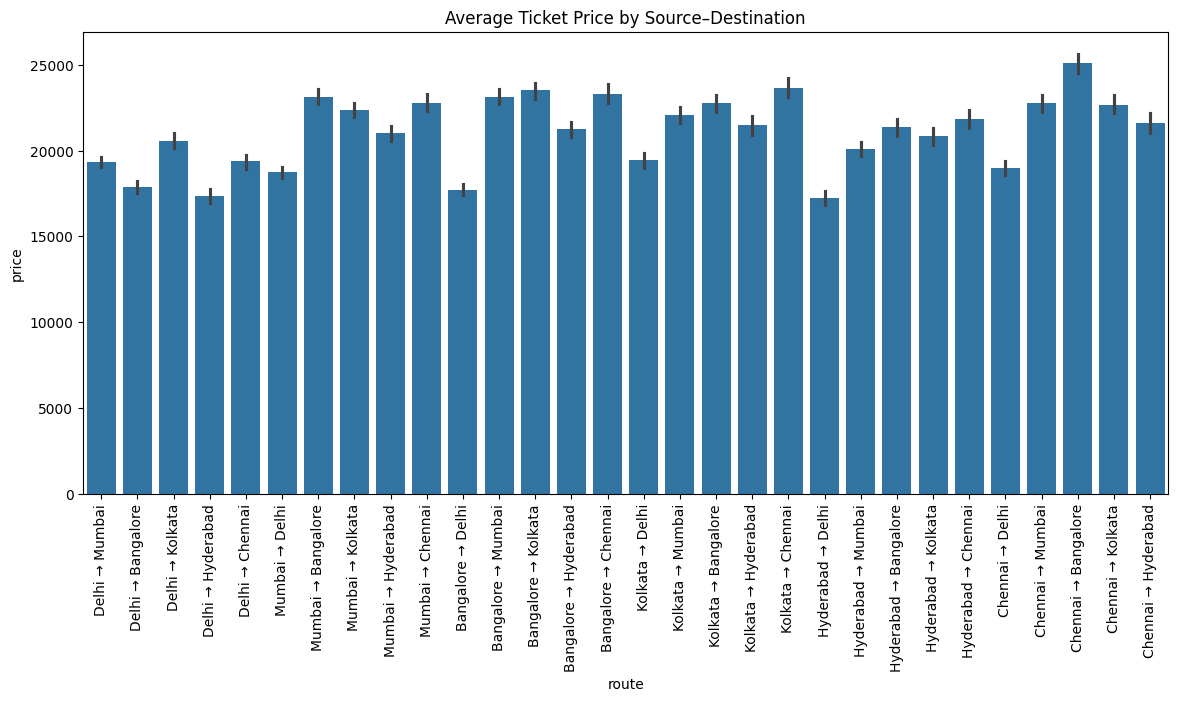

In [21]:
air_df['route'] = air_df['source_city'] + " → " + air_df['destination_city']

plt.figure(figsize=(14,6))
sns.barplot(data=air_df, x='route', y='price', estimator='mean')
plt.xticks(rotation=90)
plt.title("Average Ticket Price by Source–Destination")
plt.show()


## Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [22]:
last_minute = air_df[air_df['days_left'] <= 2]
advance = air_df[air_df['days_left'] > 2]

print("Avg price (Last-minute, ≤2 days):", last_minute['price'].mean())
print("Avg price (Advance, >2 days):", advance['price'].mean())


Avg price (Last-minute, ≤2 days): 27421.169326390056
Avg price (Advance, >2 days): 20757.498484024472


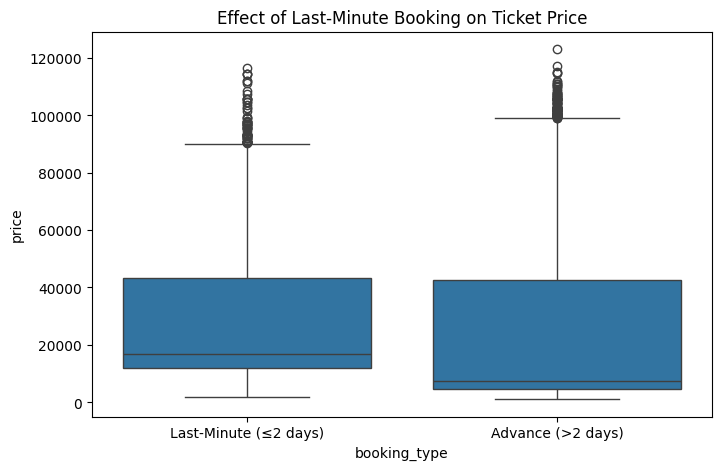

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

air_df['booking_type'] = air_df['days_left'].apply(
    lambda x: 'Last-Minute (≤2 days)' if x <= 2 else 'Advance (>2 days)'
)

plt.figure(figsize=(8,5))
sns.boxplot(data=air_df, x='booking_type', y='price')
plt.title("Effect of Last-Minute Booking on Ticket Price")
plt.show()


##     Q.8. How does the ticket price vary between Economy and Business class?

In [24]:
air_df.groupby('class')['price'].mean()


class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

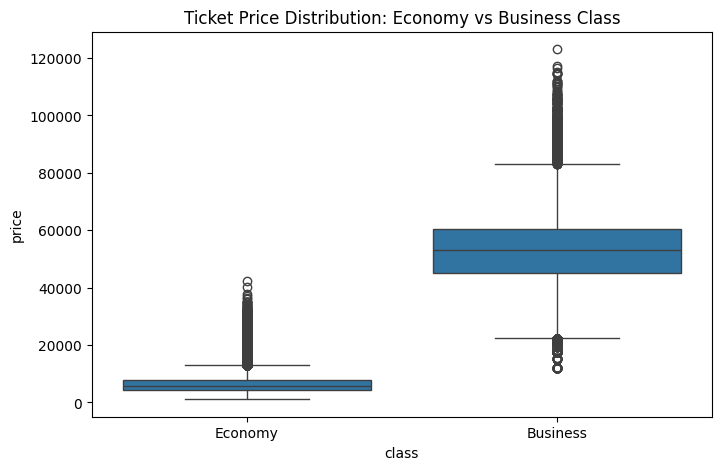

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=air_df, x='class', y='price')
plt.title("Ticket Price Distribution: Economy vs Business Class")
plt.show()


<Axes: title={'center': 'Average Price: Economy vs Business'}, xlabel='class'>

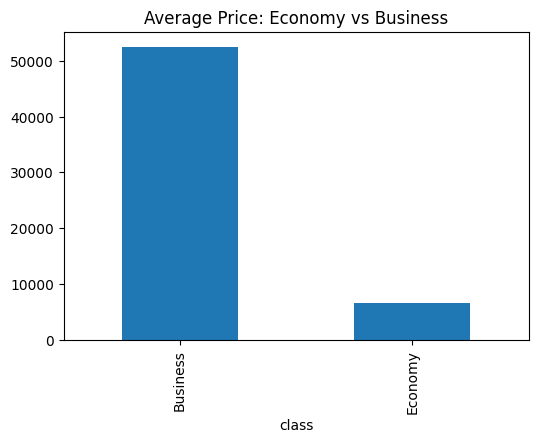

In [26]:
air_df.groupby('class')['price'].mean().plot(kind='bar', figsize=(6,4), title="Average Price: Economy vs Business")


## Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [27]:
vistara_business = air_df[
    (air_df['airline'] == 'Vistara') &
    (air_df['source_city'] == 'Delhi') &
    (air_df['destination_city'] == 'Hyderabad') &
    (air_df['class'] == 'Business')
]


In [28]:
avg_price = vistara_business['price'].mean()
avg_price


np.float64(47939.840361445786)

In [35]:
# Define numeric columns again
numeric_cols = ['duration', 'days_left', 'price']

# Remove outliers first
def remove_outliers(df, cols, k=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Try with a looser threshold
air_df_no_outliers = remove_outliers(air_df, numeric_cols, k=3.0)

print(f"Original shape: {air_df.shape}")
print(f"After outlier removal (k=3.0): {air_df_no_outliers.shape}")


Original shape: (300153, 14)
After outlier removal (k=3.0): (300144, 14)


In [37]:
# Now apply MinMaxScaler
scaler = MinMaxScaler()
air_df_scaled = air_df_no_outliers.copy()
air_df_scaled[numeric_cols] = scaler.fit_transform(air_df_no_outliers[numeric_cols])

print("\nScaled Data (first 5 rows):")
print(air_df_scaled.head())


Scaled Data (first 5 rows):
   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left     price           route  \
0           Mumbai  Economy  0.032548        0.0  0.039749  Delhi → Mumbai   
1           Mumbai  Economy  0.036434        0.0  0.039749  Delhi → Mumbai   
2           Mumbai  Economy  0.032548        0.0  0.039773  Delhi → Mumbai   
3           Mumbai  Economy  0.034491        0.0  0.039765  Delhi → Mumbai   
4           Mumbai  Economy  0.036434        0.0  0.039765  Delhi → Mumbai   

            booking_type  


In [38]:
# Check min and max of scaled columns
print("Min values after scaling:")
print(air_df_scaled[numeric_cols].min())

print("\nMax values after scaling:")
print(air_df_scaled[numeric_cols].max())


Min values after scaling:
duration     0.0
days_left    0.0
price        0.0
dtype: float64

Max values after scaling:
duration     1.0
days_left    1.0
price        1.0
dtype: float64


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
cat_cols = ['airline', 'flight', 'source_city', 'departure_time',
            'stops', 'arrival_time', 'destination_city', 'class']

# Apply one-hot encoding
air_df_encoded = pd.get_dummies(air_df_scaled, columns=cat_cols, drop_first=True)

print("Encoded Data (first 5 rows):")
print(air_df_encoded.head())


Encoded Data (first 5 rows):
   index  duration  days_left     price           route  \
0      0  0.032548        0.0  0.039749  Delhi → Mumbai   
1      1  0.036434        0.0  0.039749  Delhi → Mumbai   
2      2  0.032548        0.0  0.039773  Delhi → Mumbai   
3      3  0.034491        0.0  0.039765  Delhi → Mumbai   
4      4  0.036434        0.0  0.039765  Delhi → Mumbai   

            booking_type  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0  Last-Minute (≤2 days)              False             False           False   
1  Last-Minute (≤2 days)              False             False           False   
2  Last-Minute (≤2 days)              False             False           False   
3  Last-Minute (≤2 days)              False             False           False   
4  Last-Minute (≤2 days)              False             False           False   

   airline_SpiceJet  ...  arrival_time_Evening  arrival_time_Late_Night  \
0              True  ...                 False        

In [47]:
# Keep only numeric columns
air_df_numeric = air_df_encoded.select_dtypes(include=['int64', 'float64'])

print("Columns being normalized:", air_df_numeric.columns.tolist())

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
air_df_normalized = pd.DataFrame(
    normalizer.fit_transform(air_df_numeric),
    columns=air_df_numeric.columns
)

print("Normalized Data (first 5 rows):")
print(air_df_normalized.head())


Columns being normalized: ['index', 'duration', 'days_left', 'price']
Normalized Data (first 5 rows):
      index  duration  days_left     price
0  0.000000  0.633544        0.0  0.773707
1  0.998549  0.036381        0.0  0.039691
2  0.999670  0.016269        0.0  0.019880
3  0.999846  0.011495        0.0  0.013253
4  0.999909  0.009108        0.0  0.009940
